In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

In [32]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [33]:
model = tf.keras.models.Sequential((tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(10, activation='softmax'))
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2403 - accuracy: 0.9369 - val_loss: 0.0738 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9819 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0481 - accuracy: 0.9877 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0348 - accuracy: 0.9910 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9949 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 0.0346 - val_accuracy

In [35]:
model.save('number_model.h5')

In [65]:
shuffle([[1,2],[6,5],[7,9]], [[4,5],[3,1],[5,7]], n_samples=2)


[[[1, 2], [7, 9]], [[4, 5], [5, 7]]]

1/1 [==============================] - 0s 17ms/step


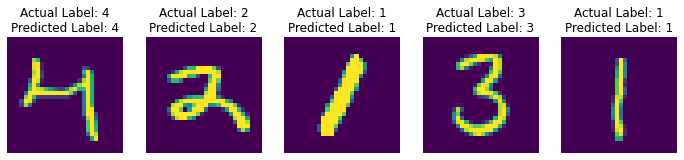

In [76]:
imgs, actual_labels = shuffle(X_test, y_test, n_samples=5)
actual_labels = np.argmax(actual_labels, axis=1)

pred = model.predict(imgs)
pred_label = np.argmax(pred, axis=1)

fig, axes = plt.subplots(ncols=5, figsize=(12,8))
axes = axes.flatten()
for i,img in enumerate(imgs):
  axes[i].set_title('Actual Label: {}\nPredicted Label: {}'.format(actual_labels[i], pred_label[i]))
  result = tf.keras.preprocessing.image.array_to_img(img)
  axes[i].imshow(result)
  axes[i].axis('off')